<a href="https://colab.research.google.com/github/Abi-Lowkey/MachineLearningTasks/blob/main/UTSMachineLearning/Regression_model_on_RegresiUTSTelkom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Ketut Satria Wibisana

NIM : 1103213148

Lecture Midterm : Regression model

Dataset : RegresiUTSTelkom.csv

Model : Polynomial/Basis Function, Decision Tree, k-NN, XGBoost Regression

Dokumentasi ChatGPT :[Link](https://chatgpt.com/share/673a252b-07b0-8006-91fd-94321563189e)

# **Prompt ChatGPT : berikan kode untuk menyambungkan google drive dengan google colab**

In [ ]:
# Mengimpor library yang dibutuhkan
from google.colab import drive

# Menyambungkan Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Explanatory Data Analysis (EDA) & Data Visualization**

In [ ]:
# Import Library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Membaca dataset
file_path = '/content/drive/MyDrive/Dataset/RegresiUTSTelkom.csv'  # Ganti dengan lokasi file dataset Anda
data = pd.read_csv(file_path)

In [ ]:
# **1.1: Informasi Dataset**
print("Informasi Dataset:")
print(data.info())
print("\nStatistik Deskriptif Dataset:")
print(data.describe())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515344 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   2001        515344 non-null  int64  
 1   49.94357    515344 non-null  float64
 2   21.47114    515344 non-null  float64
 3   73.0775     515344 non-null  float64
 4   8.74861     515344 non-null  float64
 5   -17.40628   515344 non-null  float64
 6   -13.09905   515344 non-null  float64
 7   -25.01202   515344 non-null  float64
 8   -12.23257   515344 non-null  float64
 9   7.83089     515344 non-null  float64
 10  -2.46783    515344 non-null  float64
 11  3.32136     515344 non-null  float64
 12  -2.31521    515344 non-null  float64
 13  10.20556    515344 non-null  float64
 14  611.10913   515344 non-null  float64
 15  951.0896    515344 non-null  float64
 16  698.11428   515344 non-null  float64
 17  408.98485   515344 non-null  float64
 18  383.70912   515344 non-nu

In [ ]:
# **1.2: Mengecek Missing Values**
missing_values = data.isnull().sum()
print("\nJumlah Missing Values per Kolom:")
print(missing_values)


Jumlah Missing Values per Kolom:
2001         0
49.94357     0
21.47114     0
73.0775      0
8.74861      0
            ..
-23.08793    0
68.40795     0
-1.82223     0
-27.46348    0
2.26327      0
Length: 91, dtype: int64


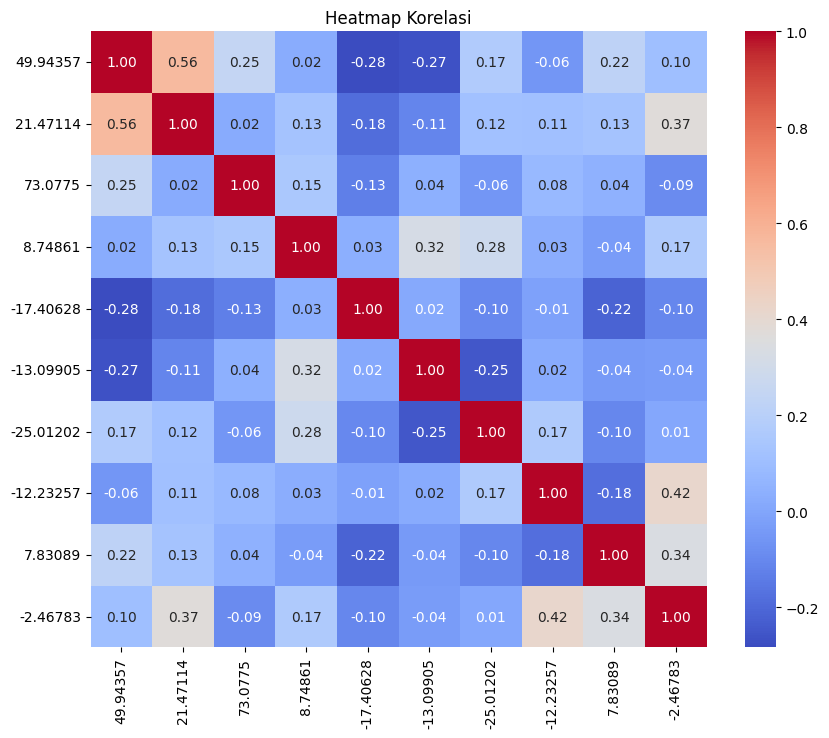

In [ ]:
# **1.3: Visualisasi Korelasi**
# Pilih subset kolom numerik untuk heatmap
subset_data = data.iloc[:, 1:11]  # Pilih 10 kolom pertama
correlation_matrix = subset_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True
)
plt.title("Heatmap Korelasi")
plt.show()


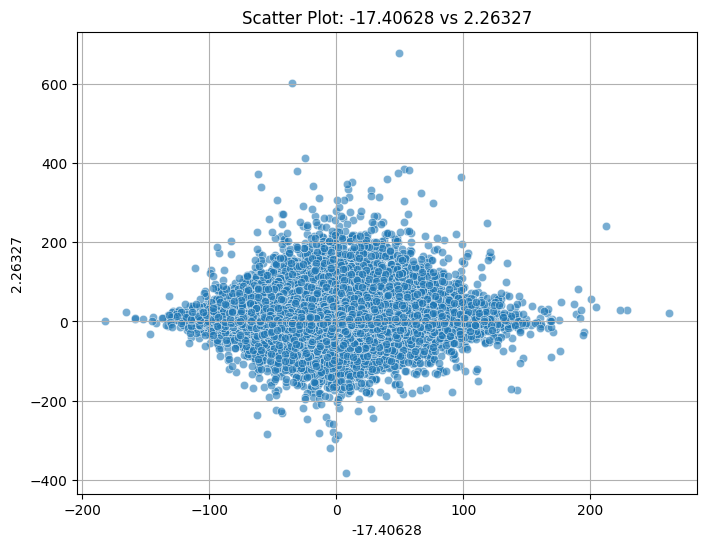

In [ ]:
# **1.4: Scatter Plot**
# Visualisasi hubungan fitur dengan target
target_column = '2.26327'
feature_column = '-17.40628'

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data[feature_column], y=data[target_column], alpha=0.6)
plt.title(f'Scatter Plot: {feature_column} vs {target_column}')
plt.xlabel(feature_column)
plt.ylabel(target_column)
plt.grid(True)
plt.show()

# **2. Pipeline dengan Scikit-Learn**

In [ ]:
# Import Library
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Memilih kolom fitur dan target
X = data[[feature_column]]  # Ganti dengan fitur utama
y = data[target_column]


In [ ]:
# Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Membagi data menjadi train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# **Pipeline untuk Polynomial Regression**
polynomial_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),  # Basis function
    ('regressor', DecisionTreeRegressor(max_depth=5))  # Regresi Polynomial
])


In [ ]:
# **Pipeline untuk Decision Tree**
tree_pipeline = Pipeline([
    ('regressor', DecisionTreeRegressor(max_depth=5))
])

In [ ]:
# **Pipeline untuk k-NN**
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Menambahkan scaler
    ('regressor', KNeighborsRegressor(n_neighbors=5))
])


In [ ]:
# **Pipeline untuk XGBoost**
xgb_pipeline = Pipeline([
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4))
])

In [ ]:
# **Fitting dan Evaluasi Semua Pipeline**
pipelines = {
    'Polynomial': polynomial_pipeline,
    'Decision Tree': tree_pipeline,
    'k-NN': knn_pipeline,
    'XGBoost': xgb_pipeline
}

In [ ]:
# Fit model dengan data yang dinormalisasi
knn_pipeline.fit(X_train_scaled, y_train)
y_pred = knn_pipeline.predict(X_test_scaled)

In [ ]:
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse:.2f}, R2: {r2:.2f}")

Polynomial - MSE: 485.30, R2: 0.00
Decision Tree - MSE: 485.30, R2: 0.00
k-NN - MSE: 580.84, R2: -0.19
XGBoost - MSE: 485.10, R2: 0.00


# **3. Hyperparameter Tuning**

In [ ]:
# Import Library
from sklearn.model_selection import GridSearchCV


In [ ]:
# **Hyperparameter Tuning untuk Polynomial Regression**
poly_param_grid = {
    'poly_features__degree': [1, 2, 3],
    'regressor__max_depth': [3, 5, 7]
}
grid_poly = GridSearchCV(polynomial_pipeline, poly_param_grid, cv=3, scoring='r2')
grid_poly.fit(X_train, y_train)
print("Best Params for Polynomial Regression:", grid_poly.best_params_)

Best Params for Polynomial Regression: {'poly_features__degree': 1, 'regressor__max_depth': 3}


In [ ]:
# **Hyperparameter Tuning untuk Decision Tree**
tree_param_grid = {
    'regressor__max_depth': [3, 5, 7, 10],
    'regressor__min_samples_split': [2, 5, 10]
}
grid_tree = GridSearchCV(tree_pipeline, tree_param_grid, cv=3, scoring='r2')
grid_tree.fit(X_train, y_train)
print("Best Params for Decision Tree:", grid_tree.best_params_)

Best Params for Decision Tree: {'regressor__max_depth': 3, 'regressor__min_samples_split': 2}


In [ ]:
# **Hyperparameter Tuning untuk k-NN**
knn_param_grid = {
    'regressor__n_neighbors': [3, 5, 7, 10],
    'regressor__weights': ['uniform', 'distance']
}
grid_knn = GridSearchCV(knn_pipeline, knn_param_grid, cv=3, scoring='r2')
grid_knn.fit(X_train, y_train)
print("Best Params for k-NN:", grid_knn.best_params_)

Best Params for k-NN: {'regressor__n_neighbors': 10, 'regressor__weights': 'uniform'}


In [ ]:
# **Hyperparameter Tuning untuk XGBoost**
xgb_param_grid = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7]
}
grid_xgb = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=3, scoring='r2')
grid_xgb.fit(X_train, y_train)
print("Best Params for XGBoost:", grid_xgb.best_params_)

Best Params for XGBoost: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 50}


# **4. Report Hasil Tuning**

In [ ]:
# Menyusun hasil tuning
results = {
    'Model': ['Polynomial Regression', 'Decision Tree', 'k-NN', 'XGBoost'],
    'Best Params': [
        grid_poly.best_params_,
        grid_tree.best_params_,
        grid_knn.best_params_,
        grid_xgb.best_params_
    ],
    'Best R2 Score': [
        grid_poly.best_score_,
        grid_tree.best_score_,
        grid_knn.best_score_,
        grid_xgb.best_score_
    ]
}

results_df = pd.DataFrame(results)
print(results_df)

                   Model                                        Best Params  \
0  Polynomial Regression  {'poly_features__degree': 1, 'regressor__max_d...   
1          Decision Tree  {'regressor__max_depth': 3, 'regressor__min_sa...   
2                   k-NN  {'regressor__n_neighbors': 10, 'regressor__wei...   
3                XGBoost  {'regressor__learning_rate': 0.1, 'regressor__...   

   Best R2 Score  
0       0.004149  
1       0.004149  
2      -0.096378  
3       0.004574  
